# 🏡 California Housing Price Prediction
### Objective
Build and compare two machine learning models — **Linear Regression** and **Random Forest Regressor** — to predict `median_house_value` using the California Housing dataset.

We will evaluate performance using metrics such as:
- R² Score
- Mean Absolute Error (MAE)
- Mean Squared Error (MSE)
- Visual comparison of predicted vs actual values.

---

In [1]:
# 📦 Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 📂 Load Dataset
file_path = 'housing_with_ocean_proximity.csv'  # Ensure this CSV is in the same directory
df = pd.read_csv(file_path)

# Display basic info
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (20640, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
# 🔍 Data Preprocessing
# Handle missing values
df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)

# Encode categorical column
le = LabelEncoder()
df['ocean_proximity'] = le.fit_transform(df['ocean_proximity'])

# Define features and target
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training and testing data prepared successfully!")

Training and testing data prepared successfully!


In [6]:
# 🤖 Model 1: Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)

# Evaluate Linear Regression
lr_r2 = r2_score(y_test, lr_pred)
lr_mae = mean_absolute_error(y_test, lr_pred)
lr_mse = mean_squared_error(y_test, lr_pred)

print("🔹 Linear Regression Performance:")
print(f"R² Score: {lr_r2:.4f}")
print(f"Mean Absolute Error: {lr_mae:.2f}")
print(f"Mean Squared Error: {lr_mse:.2f}")

🔹 Linear Regression Performance:
R² Score: 0.6137
Mean Absolute Error: 51820.75
Mean Squared Error: 5062019613.46


In [7]:
# 🌲 Model 2: Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Evaluate Random Forest
rf_r2 = r2_score(y_test, rf_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)

print("🔹 Random Forest Performance:")
print(f"R² Score: {rf_r2:.4f}")
print(f"Mean Absolute Error: {rf_mae:.2f}")
print(f"Mean Squared Error: {rf_mse:.2f}")

🔹 Random Forest Performance:
R² Score: 0.8100
Mean Absolute Error: 31960.95
Mean Squared Error: 2489857277.97


In [8]:
# 📊 Compare Both Models
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'R² Score': [lr_r2, rf_r2],
    'MAE': [lr_mae, rf_mae],
    'MSE': [lr_mse, rf_mse]
})
results

,Model,R² Score,MAE,MSE
0,Linear Regression,0.613707,51820.74815,5.062020e+09
1,Random Forest,0.809994,31960.94771,2.489857e+09


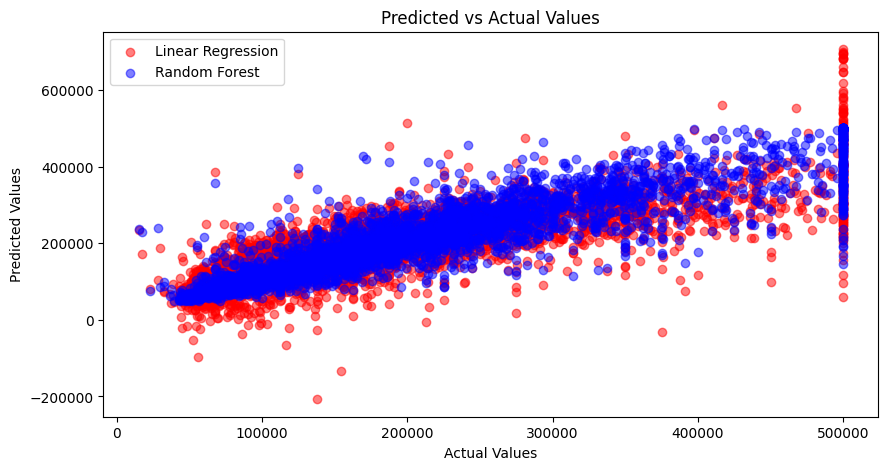

In [11]:
# 📈 Visual Comparison of Predictions
plt.figure(figsize=(10,5))
plt.scatter(y_test, lr_pred, alpha=0.5, label='Linear Regression',color='red')
plt.scatter(y_test, rf_pred, alpha=0.5, label='Random Forest', color='blue')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual Values")
plt.legend()
plt.show()

In [12]:
# 💬 Summary
print("✅ Random Forest typically performs better for non-linear relationships,")
print("while Linear Regression assumes linearity between features and target.")

✅ Random Forest typically performs better for non-linear relationships,
while Linear Regression assumes linearity between features and target.
